# Neural Network Classification with PyTorch

Classification is the task of predicting which category or class an item belongs to, with the possibility of having multiple options to choose from.



## 1. Make Classification Data & Get It Ready



In [1]:
import sklearn
import torch
from torch import nn

In [2]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [4]:
# make datafram of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


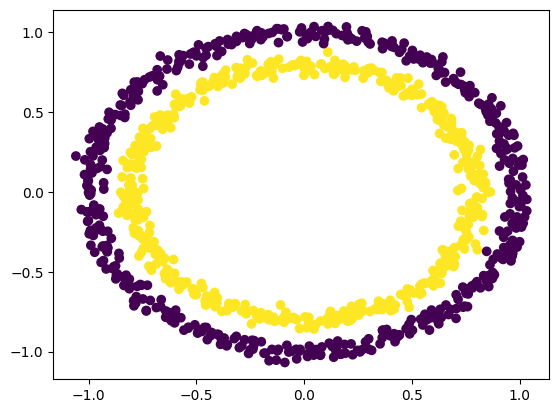

In [5]:
# plotting the data-points
import matplotlib.pyplot as plt

plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y)

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough experiment but still sizeable enough to practise the fundamentals.

## 1.1 Check Input & Output Shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

### 1.2 Turn Data Into Tensors & Creaet Train & Test Splits

In [7]:
x = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [8]:
## split data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify the dots of inner circle and outer circle.

To do so, we want to:

1. Setup the device agnostic code.
2. Construct a model (by inheriting `nn.Module` class)
3. Define a loss function and optimizer
4. Create a training and test loop

In [9]:
# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [10]:
# build a model

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        # create linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2,  # 2 in_feature -> (x, y) and upscales to 5 features
                                 out_features=5)

        self.layer_2 = nn.Linear(in_features=5, out_features=1)  # takes in 5 features from previous layer and output single feature (same shape as y)

    def forward(self, x):
        return self.layer_2(self.layer_1(x))  # x -> layer_1 -> layer_2


# instanciate an instance of above model class
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

####  Why `nn.Linear`?

You're feeding your model **two numbers** (x and y coordinates from your circle dataset) and you want the model to learn how to **draw a line (or combination of lines)** to separate inside vs outside of the circle.

But since circles are **non-linear AF**, you can't just use one straight line. So...


####  `nn.Linear` stacks help us:

1. **Transform your data** using weights + bias  
2. **Pass it through activation functions** (like `ReLU`, `Sigmoid`, etc.)  
3. **Build non-linear decision boundaries** with combos of linear layers  
4. **Learn which inputs belong to class 0 or 1**


####  Summary:

- You define the *task*
- PyTorch handles the *math*
- `nn.Linear` is the backbone for learning patterns  
- Without it, your model is just a dummy staring at data like “huh?”


In [11]:
# replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [12]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2840,  0.4116],
                      [ 0.1766, -0.5337],
                      [ 0.4118,  0.3683],
                      [-0.5701,  0.5671],
                      [-0.5736,  0.3162]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4682, -0.0674, -0.3274,  0.6791,  0.5222], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1590,  0.1923, -0.1505,  0.2020,  0.0306]], device='cuda:0')),
             ('1.bias', tensor([-0.2735], device='cuda:0'))])

In [13]:
# make predictions

with torch.inference_mode():
    untrained_preds = model_0(x_test.to(device))

print(f"Predictions: {untrained_preds}")

Predictions: tensor([[-0.0596],
        [-0.1312],
        [-0.0237],
        [-0.0691],
        [-0.2649],
        [-0.3067],
        [-0.3173],
        [-0.3590],
        [-0.0136],
        [-0.1387],
        [-0.0367],
        [-0.0909],
        [-0.3466],
        [-0.0563],
        [ 0.0214],
        [-0.3191],
        [-0.2159],
        [ 0.0049],
        [-0.0225],
        [ 0.0278],
        [-0.1298],
        [-0.3732],
        [-0.0074],
        [ 0.0349],
        [-0.2660],
        [-0.3310],
        [-0.1407],
        [-0.3520],
        [ 0.0382],
        [-0.0929],
        [-0.2704],
        [-0.2535],
        [-0.0481],
        [-0.1998],
        [-0.0285],
        [-0.1588],
        [-0.0781],
        [-0.0442],
        [-0.1650],
        [-0.0721],
        [ 0.0012],
        [ 0.0016],
        [-0.2190],
        [-0.2726],
        [-0.0458],
        [-0.1726],
        [-0.2982],
        [-0.1234],
        [-0.1451],
        [-0.2895],
        [-0.0640],
        [-0.0477],

### Setup Loss Function & Optimizer

For classfication you might want binary cross entropy or categorical entropy (cross entropy)

#### Difference Between `BCELoss` and `BCEWithLogitsLoss` in PyTorch

| Feature               | `BCELoss`                       | `BCEWithLogitsLoss`                          |
|-----------------------|----------------------------------|----------------------------------------------|
| **Input type**        | Probabilities (0–1)             | Raw logits (any real number)                 |
| **Sigmoid needed?**   | YES (you add it manually)       | NO (it's built-in)                           |
| **Numerical stability** | Lower                          | Higher (uses log-sum-exp trick internally)   |
| **Preferred in practice?** | Not really                  | YES                                        |


In [14]:
# setup the loss funnction
loss_fn = nn.BCEWithLogitsLoss()

# setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

## Train The Model

### Going From Raw Logits -> Prediction Probabilities -> Prediction Label

#### What is a Logit?

A **logit** is the raw score (a.k.a. the **log-odds**) that comes out of a model **before** applying a sigmoid function.

##### Think of it like this:

Your model spits out a number (could be negative, zero, positive, whatever).  
That number is the **logit**.

You pass it through a **sigmoid function** to convert it into a probability between 0 and 1.

Our model's outputs are going to be raw **logits**.

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking `argmax()`.

##### What An Activation Function Does:

- Takes the output from a neuron (like `weight * x + bias`)
- Applies a **non-linear transformation**
- Helps the model learn **complex patterns**


##### Popular Activation Functions:

| Name      | What it does                      | Use when                      |
|-----------|-----------------------------------|-------------------------------|
| `ReLU`    | Replaces negatives with 0         | Most common, fast, deep networks |
| `Sigmoid` | Squashes output between 0 and 1   | Binary classification probs   |
| `Tanh`    | Squashes between -1 and 1         | Works in some fancy setups    |
| `Softmax` | Gives probs that all sum to 1     | Multi-class output            |


In [15]:
model_0.eval()

with torch.inference_mode():
    y_logits = model_0(x_test.to(device))

y_logits[:5]

tensor([[-0.0596],
        [-0.1312],
        [-0.0237],
        [-0.0691],
        [-0.2649]], device='cuda:0')

In [16]:
# use the sigmoid activation function on our logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.4851],
        [0.4672],
        [0.4941],
        [0.4827],
        [0.4342]], device='cuda:0')

In [17]:
torch.round(y_pred_probs)[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

### Building a Training & Test Loop

In [18]:
torch.manual_seed(42)

epochs = 900

# put the data to target device

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# build the training loop

for epoch in range(epochs):
    model_0.train()

    # forward pass
    y_logits =  model_0(x_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    # calculate the loss
    loss = loss_fn(y_logits,  # nn.BCELogitsWithLoss expects input as raw logits
                   y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # testing
    model_0.eval()

    with torch.inference_mode():
        # forward pass
        test_logits = model_0(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # calculate the loss
        test_loss = loss_fn(test_logits, y_test)

    # print out to see the output

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.69882 | Test Loss: 0.69659
Epoch: 10 | Loss: 0.69700 | Test Loss: 0.69489
Epoch: 20 | Loss: 0.69614 | Test Loss: 0.69408
Epoch: 30 | Loss: 0.69563 | Test Loss: 0.69361
Epoch: 40 | Loss: 0.69527 | Test Loss: 0.69330
Epoch: 50 | Loss: 0.69500 | Test Loss: 0.69307
Epoch: 60 | Loss: 0.69477 | Test Loss: 0.69291
Epoch: 70 | Loss: 0.69458 | Test Loss: 0.69278
Epoch: 80 | Loss: 0.69443 | Test Loss: 0.69269
Epoch: 90 | Loss: 0.69429 | Test Loss: 0.69263
Epoch: 100 | Loss: 0.69417 | Test Loss: 0.69259
Epoch: 110 | Loss: 0.69407 | Test Loss: 0.69256
Epoch: 120 | Loss: 0.69397 | Test Loss: 0.69255
Epoch: 130 | Loss: 0.69389 | Test Loss: 0.69255
Epoch: 140 | Loss: 0.69382 | Test Loss: 0.69256
Epoch: 150 | Loss: 0.69375 | Test Loss: 0.69258
Epoch: 160 | Loss: 0.69369 | Test Loss: 0.69260
Epoch: 170 | Loss: 0.69364 | Test Loss: 0.69263
Epoch: 180 | Loss: 0.69359 | Test Loss: 0.69266
Epoch: 190 | Loss: 0.69354 | Test Loss: 0.69269
Epoch: 200 | Loss: 0.69350 | Test Loss: 0.69273
Epo

### Improving The Model

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function

In [19]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [20]:
# create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params =model_1.parameters(), lr = 0.1)

In [21]:
# build training and test loop

torch.manual_seed(42)

epochs = 1000

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    y_logits = model_1(x_train).squeeze()

    loss = loss_fn(y_logits, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # testing

    model_1.eval()

    with torch.inference_mode():
        # forward pass
        test_logits = model_1(x_test).squeeze()

        # calculate the loss
        test_loss = loss_fn(test_logits, y_test)

    # print out what's happening

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.69396 | Test Loss: 0.69261
Epoch: 10 | Loss: 0.69369 | Test Loss: 0.69270
Epoch: 20 | Loss: 0.69351 | Test Loss: 0.69283
Epoch: 30 | Loss: 0.69339 | Test Loss: 0.69297
Epoch: 40 | Loss: 0.69329 | Test Loss: 0.69310
Epoch: 50 | Loss: 0.69322 | Test Loss: 0.69324
Epoch: 60 | Loss: 0.69317 | Test Loss: 0.69336
Epoch: 70 | Loss: 0.69312 | Test Loss: 0.69348
Epoch: 80 | Loss: 0.69309 | Test Loss: 0.69359
Epoch: 90 | Loss: 0.69307 | Test Loss: 0.69370
Epoch: 100 | Loss: 0.69305 | Test Loss: 0.69379
Epoch: 110 | Loss: 0.69303 | Test Loss: 0.69388
Epoch: 120 | Loss: 0.69302 | Test Loss: 0.69396
Epoch: 130 | Loss: 0.69301 | Test Loss: 0.69403
Epoch: 140 | Loss: 0.69301 | Test Loss: 0.69409
Epoch: 150 | Loss: 0.69300 | Test Loss: 0.69415
Epoch: 160 | Loss: 0.69300 | Test Loss: 0.69421
Epoch: 170 | Loss: 0.69299 | Test Loss: 0.69425
Epoch: 180 | Loss: 0.69299 | Test Loss: 0.69430
Epoch: 190 | Loss: 0.69299 | Test Loss: 0.69434
Epoch: 200 | Loss: 0.69299 | Test Loss: 0.69437
Epo

## The Missing Piece: Non-Linearity

### Build a Model With Non Linearity

In [26]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()   # non-linear activation function

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [27]:
# setup the loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(), lr= 0.1)

### Training The Model With Non-Linearity



In [28]:
torch.manual_seed(42)

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    model_3.train()

    # forwrd pass
    y_logits = model_3(x_train).squeeze()

    # calculate the loss
    loss = loss_fn(y_logits, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # testing
    model_3.eval()

    with torch.inference_mode():
        # forward pass
        test_logits = model_3(x_test).squeeze()

        # calcualte the loss
        test_loss = loss_fn(test_logits, y_test)

    # print out what's happening

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.69295 | Test loss: 0.69319
Epoch: 100 | Loss: 0.69115 | Test loss: 0.69102
Epoch: 200 | Loss: 0.68977 | Test loss: 0.68940
Epoch: 300 | Loss: 0.68795 | Test loss: 0.68723
Epoch: 400 | Loss: 0.68517 | Test loss: 0.68411
Epoch: 500 | Loss: 0.68102 | Test loss: 0.67941
Epoch: 600 | Loss: 0.67515 | Test loss: 0.67285
Epoch: 700 | Loss: 0.66659 | Test loss: 0.66322
Epoch: 800 | Loss: 0.65160 | Test loss: 0.64757
Epoch: 900 | Loss: 0.62362 | Test loss: 0.62145


## Replicating Non-Linear Activation Function

Neural networks rather than telling us the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

Those tools are linear & non-linear functions.

In [29]:
# create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

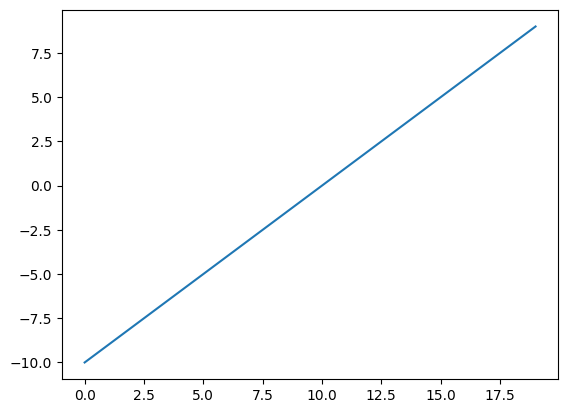

In [30]:
# visualize the data
plt.plot(A)

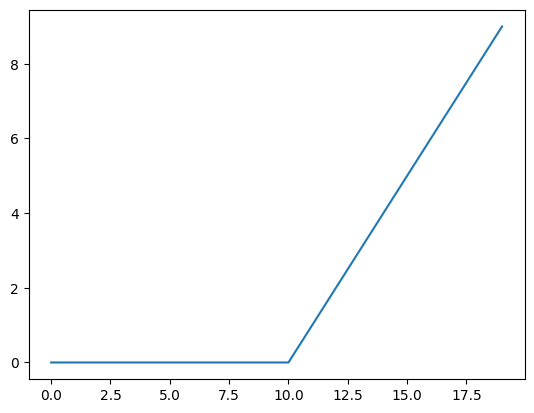

In [31]:
# plot the non-linear ReLU function
plt.plot(torch.relu(A))

## Multi-class Classification Problem

* Binary classification - one thing or another (cat vs. dog)
* Multiclass classification - more than one thing or another (cat vs. dog vs. dinosour)

### Creating a Toy multi-class dataset

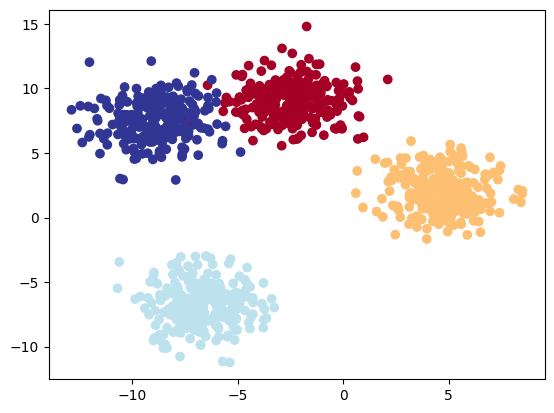

In [32]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

x_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5, # give the cluster a little shake up
                            random_state = RANDOM_SEED)

x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# test-train split

x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob, y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

plt.scatter(x_blob[:, 0], x_blob[:, 1], cmap = plt.cm.RdYlBu, c = y_blob)


### Building Multiclass classfication model


In [33]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features = output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


# create an instance of this model and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4).to(device) # have to identify 4 different classes

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### Create Loss Function & Optimizer

In [34]:
# create a loss function
loss_fn = nn.CrossEntropyLoss()

# create an optimizer
optimizer = torch.optim.SGD(params = model_4.parameters(), lr = 0.1)

### Getting Prediction Probabilities For a Multi-class Model

In order to evaluate, train and test our model, we need to convert model's output (logits) to prediction probabilities and then to prediction labels.

Logits -> Prediction probabilities -> Prediction labels

In [37]:
# preidct

model_4.eval()

x_blob_test = x_blob_test.to(device)

with torch.inference_mode():
    y_logits = model_4(x_blob_test)

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [38]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:5]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')

### Why Are There 4 Values in Each Feature Vector?

Let’s take this feature vector as an example:

[0.3169, 0.3244, 0.1405, 0.2182]


These four values represent the **model’s predicted probabilities** for each class.  
Here’s how to interpret it:

- The model says there’s a **31.69%** chance the input belongs to **Class 0**  
- A **32.44%** chance it belongs to **Class 1**  
- A **14.05%** chance for **Class 2**  
- And a **21.82%** chance for **Class 3**

All these values **add up to 1**, because they form a **probability distribution** over the 4 possible classes.

So basically:  
> The model’s like “Yo, I ain't 100% sure, but here's how I’m feelin’ about this input... pick one.” 🎯

### Why Does My Multi-Class Model Output 4 Values Instead of Just 1 Class?

You built a multi-class classification model that outputs something like this:

[0.3169, 0.3244, 0.1405, 0.2182]


These are the **predicted probabilities** for each of the 4 classes.


### 🧠 But Why Not Just Spit Out ONE Number?

Because:

- During training, you use **`nn.CrossEntropyLoss()`**, which **expects raw logits for _all_ classes** — not just a class index.
  
- The model needs to **learn gradients for all classes**, not just whichever one it thinks is most likely right now.

So your model has to output **a value for every class**, so that the loss function can compare the prediction for *each* class against the ground truth label, and compute a proper gradient.


### 🧪 But Can It Output Just a Class Number?

**Yes — but only during inference (after training).**  
You can use:

```python
torch.argmax(model_output, dim=1)



In [39]:
y_blob_test[:10]  # not in the same shape as our model's output

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

### Create Training & Testing Loop For This Model

In [40]:
torch.manual_seed(42)

# set the no. of epochs
epochs = 100

# put the data to the target device
x_blob_train, y_blob_train = x_blob_train.to(device), y_blob_train.to(device)
x_blob_test, y_blob_test = x_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    # training
    model_4.train()

    y_logits = model_4(x_blob_train).squeeze()

    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # calculate the loss
    loss = loss_fn(y_logits, y_blob_train.type(torch.int64))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_4.eval()

    with torch.inference_mode():
        y_test_logits = model_4(x_blob_test)
        y_test_preds = torch.softmax(y_test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(y_test_logits, y_blob_test.type(torch.int64))

    # print out what's happening

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 1.1588265895843506 | Test Loss: 1.0755419731140137
Epoch: 10 | Loss: 0.6447554230690002 | Test Loss: 0.660687267780304
Epoch: 20 | Loss: 0.42535150051116943 | Test Loss: 0.43074116110801697
Epoch: 30 | Loss: 0.25294229388237 | Test Loss: 0.24507611989974976
Epoch: 40 | Loss: 0.11232148110866547 | Test Loss: 0.10228512436151505
Epoch: 50 | Loss: 0.06626509875059128 | Test Loss: 0.058475371450185776
Epoch: 60 | Loss: 0.05068015679717064 | Test Loss: 0.042932283133268356
Epoch: 70 | Loss: 0.042996760457754135 | Test Loss: 0.03490965813398361
Epoch: 80 | Loss: 0.038361381739377975 | Test Loss: 0.02987821400165558
Epoch: 90 | Loss: 0.03524843230843544 | Test Loss: 0.026626521721482277


#### Note: `y_blob_train` must be converted to `int64`, in order to work with `CrossEntropyLoss` function

In [41]:
model_4.eval()

with torch.inference_mode():
    test_logits = model_4(x_blob_test)
    y_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

result = y_preds == y_blob_test
result

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 